# Partie 1. RNN sur onde sinusoidale

Fonctionnement de l'entraînement et de l'évaluation du RNN:
Pour une série de données temporelles on divise les données en train_set et test_set
pas de fractionnement aléatoire comme fait souvent fractionnnement entraînement/test.
Nous allons plutôt simulé ce qui est ce qu'il serait possible de prévoire dans les informations futures
on fixera un point de coupure quelque part dans nos données d'entraînement pour spécifier une certaine gamme de données pour notre ensemble d'entraînement et une future gamme comme ensemble de test
Pendant l'entraînement,évaler la performance sur base de l'ensemble de test.
Au fur et mesure que nous entraînons, nous ferons des prévisions sur cette gamme pour voir visuellement l'entraînement
Nous pouvons visualiser plutard pour voir et évaluer comment nous travaillons réellement et effectuons ces prévisions
On espère donc obtenir quelque chose qui ressemble à une onde sinusoidale et qui nous montre en gros que nous avons un bon ajustement
Une fois satisfait des résultats de cette partie du test, il sera temps de faire des prévisions dans un futur inconnu.
Ce qui signifie qu'il faut entraîner de nouveau sur toutes les données disponibles (entraînement/test) et faire des prédictions au-delà de la porté des données d'origine.



In [1]:
# Importer les classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# utilisation de numpy pour créer une onde sinusoidale
X=np.linspace(0,50,501)

In [3]:
y=np.sin(X)

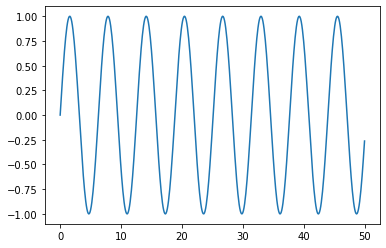

In [4]:
# tracage de l'onde sinusoidale de 0 à 50
plt.plot(X,y)

In [5]:
# Transformation de notre onde sinusoidale en dataframe
df=pd.DataFrame(data=y,index=X,columns=['Sinus'])

In [6]:
df.head()

,Sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [7]:
# repartition entraînement/Test
# On va spécifier quel pourcentage de notre data_set qu'on va utiliser pour la gamme de données test
# prendre en concidération l'objectif globale pour décider du pourcenatge de données qui représenteront le set de test 
len(df)

501

In [8]:
# création d'une variable test_percent
test_percent=0.1

In [9]:
# Détermination du point de coupure
# on prend la longueur du dataframe et on multiplie par le pourcentage 
# Ce qui donne que 10% de mes données correspondent à 50 points et trouver à quel index ils se trouvent dans le dataframe pour prendre
# les 50 derniers points pour le set de test

len(df)*test_percent

50.1

In [10]:
#arrondir le résultat
# notre point de coupure
# l'index de test devrait être 50 en partant de la fin du dataframe
test_point=np.round(len(df)*test_percent)

In [11]:
# création d'une variable test_index
# Point de coupure pour l'ensemble d'entraînement et de test 
test_index=int(len(df)- test_point)

In [12]:
train=df.iloc[:test_index]

In [13]:
test=df.iloc[test_index:]

In [14]:
# Mise à l'échelle des données: un peu différent des ANN de part le fonctionnement particulier des RNN 
#qui s'alimentent avec ses sorties(output)
# mettre à l'échelle y: variable cible car nous alimentons le réseau avec les sorties en retours
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)


MinMaxScaler()

In [15]:
# Transformation des ensembles de données
scaled_train=scaler.transform(train)# contient les index de X:index de temps et les y: les informations
scaled_test=scaler.transform(test)

# Générateur de Batch
prendre les données d'entrâinement pour créer des batchs ou lots pour la phase d'entraînement

Paramètres ou arguments de TimeseriesGenerator:classe qui génère batch ou lot pour ses données de séquences. Il prend en entrer des données de séquences

data:données X réel sur lesquelles on entraîne
targets: ce sont les labels. data et targets seront identiques pcq on a des données d'info time series. on passera la même source qui sera les données d'entraînement mis à l'échelle
length: Taille ou longeur de la séquence de sortie càd le nombre de pas temporel ou unité de temps. ne dois pas être choisi arbitrairement, cela doit être suffisant pour prendre en compte les effets de saisonnalité ou tout autre effet de répétition Plus la valeur du paramètre length est élevée plus l'entraînement sera long
batch_size:nombre d'échantillon de série temporelle par Batch ou lot

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2022-04-21 13:42:48.565548: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 13:42:48.565572: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
# création de quelques variables 
# length ne dois pas être choisi arbitrairement, cela doit être suffisant pour prendre en compte les effets de saisonnalité ou tout autre effet de répétition
# length=25 cela alimente mon generator avec 25 points de données et demande au modèle de prédire la 26ème valeur
length=25
batch_size=1

# création du generator
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [18]:
# essayer de tester les paramètres :length/batch_size pour s'assurer ce que font ces paramètres exactement
# regardons la taille scaled_train
len(scaled_train)
# nos données d'entraînement ont 451 points de données 

451

In [19]:
# regardons maintenant la taille de notre objet generator: qui génère des lots ou batch pour nous
# la taille de notre generator est 449-2(valeur de length)
len(generator)

426

In [20]:
# exploration du premier batch: index 0
# on va faire une petite décomposition en tuple car il retourne à la fois X et le y qui doit être prédit à partir de X
# il s'agit du tout premier batch généré à partir de cet objet de generateur de time series
# on obteint 4 points de données pour notre générateur
X,y=generator[0]

In [21]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [22]:
# Que signifie ces valeurs? pour cela regardons nos données d'entraînment: scaled_train et voyons voir ce qui se passe ici lorqu'on dit à notre RNN
#sachant qu'on a ces 4 points de données X ci-haut d'essayer de prédire la cinquième valeur de y ci-haut
# on remarque les 2 premières valeurs de scaled_train sont 4.99 et 5.4
# Etant donné cette taille de 4  prédit y dans le futur 
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


<AxesSubplot:>

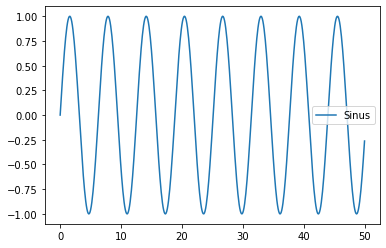

In [23]:
df.plot()

# Création du modèle

In [24]:
# S"assurer d'avoir un cycle entier ou une saisonnalité complète et ainso prendre ce nombre de point  pour le paramètre length pour 1 batch
# on sait qu'il y a 500 point entre 0 et 50
# on voit graphiquement qu'un cycle va de 0 à une valeur légèrement > 5, il nous faut probablement entre 50et 100 points dans nos batchs. donc on fixe length:50
length=50
batch_size=1

# création du generator
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [25]:
# import des librairies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
# Fixation du nombre de features sur lequel nous allons entraîné
# Dans ce cas on a seulement une seule feature X afin de prédire y
n_features=1

In [27]:
# création du modèle
# paramètre RNN à voir: units: nombre de neurone, input_shape:forme des données d'entrée définit par notre generator
# le nombre de neurone qu'on souhaite passer doit être relié à longeur ou taille des batchs
model= Sequential()
model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


2022-04-21 13:47:46.727491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-21 13:47:46.727526: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-21 13:47:46.727554: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hprisser): /proc/driver/nvidia/version does not exist
2022-04-21 13:47:46.727863: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# resumé du model qui nous permet de voir les différentes couches du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Entraînement du modèle: on passe le generator crée précédemment
# les RNN prennent plus de temps à entraîner  qu'un ANN
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 4s 7ms/step - loss: 0.0195
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 1.0820e-04
Epoch 3/5
401/401 [==============================] - 3s 6ms/step - loss: 2.4595e-04
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 3.9477e-04
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 3.9644e-05


<AxesSubplot:>

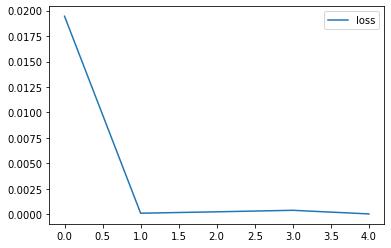

In [30]:
# Evaluation du model
losses=pd.DataFrame(model.history.history)
losses.plot()

In [31]:
# Pensons au 1er batch à passer dans le modèle pour prédire quelque chose sur le set de test
# ce qu'on fait on prend les 50 derniers points du set d'entraînement pour prédire un point dans le futur qui est le premier du set de test
firs_eval_batch=scaled_train[-length:]

In [32]:
# avant de passer cela dans le modèle il faut reshape à la forme attendue par le modèle
firs_eval_batch=firs_eval_batch.reshape((1,length,n_features))


In [33]:
model.predict(firs_eval_batch)

array([[0.94713104]], dtype=float32)

In [34]:
scaled_test[0]

array([0.94955134])

In [35]:
# utilisation de cette logique dans une boucle for pour toujours avoir 50 point et déplacer les séquences de 1 en 1
# ainsi en mesure qu'in entraîne on continue d'ajouter un point prédit dans la séquence des 50 points du batch
# création du liste de vide
test_prediction=[]
# premier batch d'évaluation
first_eval_batch=scaled_train[-length:]
# batch actuel
current_batch=first_eval_batch.reshape((1,length,n_features))

In [36]:
current_batch
# triple crochets signifiant un tableau de dimension 3
# le premier du batch doit être remplacé par mon dernier point prédit et ainsi de suite
# la boucle for va retranscrire cela

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [37]:
predicted_value=[[[99]]]
np.append(current_batch[:,1:,:],[[[99]]],axis=1)
# cette commande décale les points d'une ligen de temps d'un pas temporel
# ce qui signifie prend tout dans la 1ère dimension
# première et dernière dimension on prend tout
# pour la dimension intermédiaire, on prend tout à partir de l'index 1: tout sauf le 1 er point 

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [38]:
# Création de la boucle for
test_prediction=[]# on part d'une liste vide
# premier batch d'évaluation
first_eval_batch=scaled_train[-length:]# premier batch d'évaluation correspondant au 50 dernier point du batch d'entraînement
# batch actuel
current_batch=first_eval_batch.reshape((1,length,n_features))# transformation avec.reshape() basé sur la longeur length et le n_features et on assigne à current_batch

for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]# première prédiction sur le bacth actuel
  test_prediction.append(current_pred)# stockage de la prediction actuelle dans la liste test_prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)# pour continer à prédire dans le futur, décalage du current_batch d'1 unité, qui se caractérise par la suppression de 1er point 

In [39]:
test_prediction

[array([0.94713104], dtype=float32),
 array([0.966925], dtype=float32),
 array([0.9819683], dtype=float32),
 array([0.9920069], dtype=float32),
 array([0.9968328], dtype=float32),
 array([0.99715126], dtype=float32),
 array([0.9921776], dtype=float32),
 array([0.98201966], dtype=float32),
 array([0.967883], dtype=float32),
 array([0.94835824], dtype=float32),
 array([0.9245471], dtype=float32),
 array([0.89592654], dtype=float32),
 array([0.8643925], dtype=float32),
 array([0.829441], dtype=float32),
 array([0.7916653], dtype=float32),
 array([0.7510318], dtype=float32),
 array([0.70785886], dtype=float32),
 array([0.6633828], dtype=float32),
 array([0.6173013], dtype=float32),
 array([0.5705603], dtype=float32),
 array([0.522652], dtype=float32),
 array([0.47464323], dtype=float32),
 array([0.42660713], dtype=float32),
 array([0.37991384], dtype=float32),
 array([0.33470386], dtype=float32),
 array([0.29105332], dtype=float32),
 array([0.24929829], dtype=float32),
 array([0.20996831],

In [40]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [41]:
# faire la transformation inverse des prédictions afin de les avoir sans échelle
true_prediction=scaler.inverse_transform(test_prediction)

In [42]:
# pour comparer on ava ajouter une seconde colonne à notre dataframe test qui contient les prédictions
test['pred']=true_prediction

/tmp/ipykernel_194399/1659957716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred']=true_prediction


<AxesSubplot:>

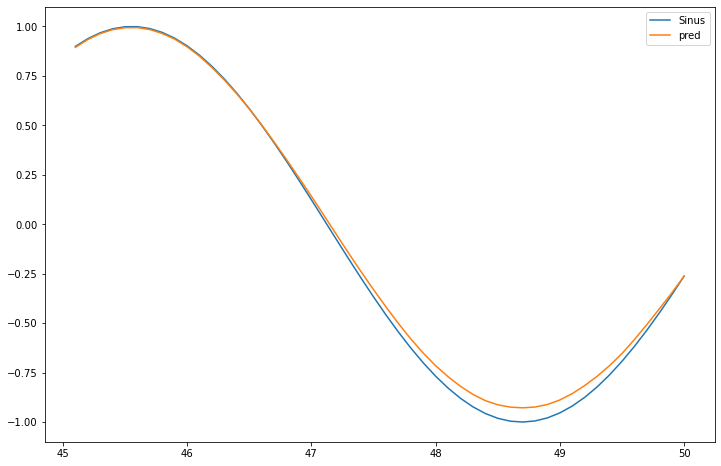

In [43]:
test.plot(figsize=(12,8),)
# notre modèle est capable de mimer une onde sinusoidale
# Plus on avance dans la prédiction, plus nos prédictions sont éloignés, normal car on prédit à partir des valeurs elles mêmes prédites
# le premier point devrait être le plus précis car on utilise des données réelles cad les 50 points pr&écésents dans le set d'entraînement pour prédire
# ce premier point puis en passant au point suivant j'utilise 49 points réelles du set d'entraînement et le 1 er point prédit pour faire
# cette deuxième prédiction
# a la fin il restera 49 point de preidction et 1 donnée d'orignie du set d'entraînement

# Partie 2.  implémentation LSTM et prévisions
Utilisation du réseau LSTM
  - Création de 2 générateurs: un pour les données d'entraînement et un pour les données de validation
  - generator de validation va continuer à tester sur la gamme d'entraînement pendant que l'on prédit


In [44]:
# création d'un mécanisme d'arrêt anticipé
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor='val_loss', patience=2)

In [45]:
# création du générateur pour les donneés de validation
length=49
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)# generator d'entrâinement
validation_generator=TimeseriesGenerator(scaled_test,scaled_test, length=length,batch_size=1)

In [46]:
# création du modèle LSTM
model= Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(generator,epochs=20,validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 8s 17ms/step - loss: 0.0184 - val_loss: 1.9369e-05
Epoch 2/20
402/402 [==============================] - 5s 13ms/step - loss: 1.4058e-04 - val_loss: 4.7479e-06
Epoch 3/20
402/402 [==============================] - 6s 15ms/step - loss: 4.3484e-05 - val_loss: 8.1928e-06
Epoch 4/20
402/402 [==============================] - 6s 15ms/step - loss: 8.0913e-05 - val_loss: 6.2458e-06


In [49]:
#Evaluation des performances sur le set de test
# Création de la boucle for
test_prediction=[]# on part d'une liste vide
# premier batch d'évaluation
first_eval_batch=scaled_train[-length:]# premier batch d'évaluation correspondant au 50 dernier point du batch d'entraînement
# batch actuel
current_batch=first_eval_batch.reshape((1,length,n_features))# transformation avec.reshape() basé sur la longeur length et le n_features et on assigne à current_batch

for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]# première prédiction sur le bacth actuel
  test_prediction.append(current_pred)# stockage de la prediction actuelle dans la liste test_prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)# pour continer à prédire dans le futur, décalage du current_batch d'1 unité, qui se caractérise par la suppression de 1er point 

In [50]:
# Faire la transformation inverse 
true_prediction=scaler.inverse_transform(test_prediction)

In [51]:
# ajoute une nouvelle colonne au dataframe pour faire la comparaison
test['LSTM_Pred']=true_prediction

/tmp/ipykernel_194399/414494296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_Pred']=true_prediction


<AxesSubplot:>

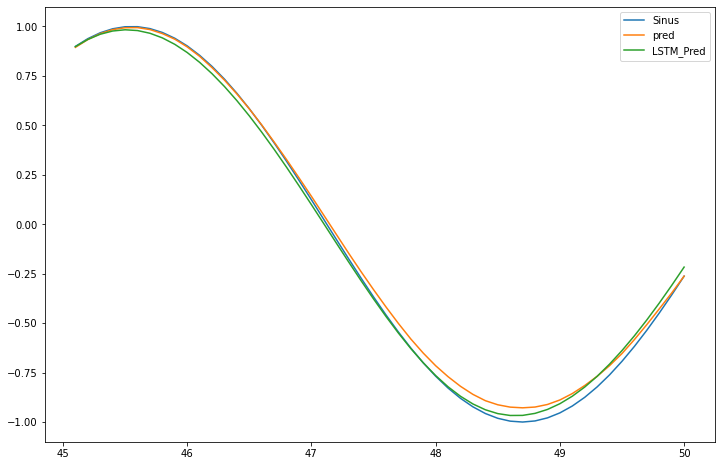

In [52]:
# Traçage de la courbe
test.plot(figsize=(12,8))
# la courbe verte LSRM a tendance à bien performer à la fin

<AxesSubplot:>

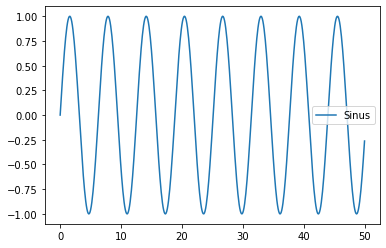

In [53]:
# Faire une prédiction au dela de l'index 50
df.plot()

Pour faire la prédiction au dela de l'index 50:
  - on va réentrainer sur toutes les données 
  - on met à l'échelle toute nos données

In [54]:
full_scaler=MinMaxScaler()
scaler_full_data=full_scaler.fit_transform(df)

In [55]:
# création du generator du df
generator_full=TimeseriesGenerator(scaler_full_data,scaler_full_data,length=length,batch_size=1)
model= Sequential()
model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(generator_full,epochs=5)

Epoch 1/5
452/452 [==============================] - 8s 15ms/step - loss: 0.0174
Epoch 2/5
452/452 [==============================] - 7s 15ms/step - loss: 9.0379e-05
Epoch 3/5
452/452 [==============================] - 6s 14ms/step - loss: 1.4004e-04
Epoch 4/5
452/452 [==============================] - 7s 15ms/step - loss: 1.6631e-04
Epoch 5/5
452/452 [==============================] - 7s 15ms/step - loss: 6.3574e-04


In [56]:
#Evaluation des performances sur le set de test
# aucun moyen de comparer ces prédictions car elles sont dans le futur
# Création de la boucle for
forecast=[]# on part d'une liste vide
# premier batch d'évaluation
first_eval_batch=scaled_train[-length:]# premier batch d'évaluation correspondant au 50 dernier point du batch d'entraînement
# batch actuel
current_batch=first_eval_batch.reshape((1,length,n_features))# transformation avec.reshape() basé sur la longeur length et le n_features et on assigne à current_batch

for i in range(25):
  current_pred=model.predict(current_batch)[0]# première prédiction sur le bacth actuel
  forecast.append(current_pred)# stockage de la prediction actuelle dans la liste test_prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)# pour continer à prédire dans le futur, décalage du current_batch d'1 unité, qui se caractérise par la suppression de 1er point 

In [57]:
from numpy.core.numeric import full
# Faire la transformation inverse 
forecast=full_scaler.inverse_transform(test_prediction)

In [58]:
# pour obtenir la valeur à reseigner dans forecas_index
25*0.1


2.5

In [59]:
forecast_index=np.arange(50.1,52.6,step=0.1)

In [60]:
len(forecast_index)

25

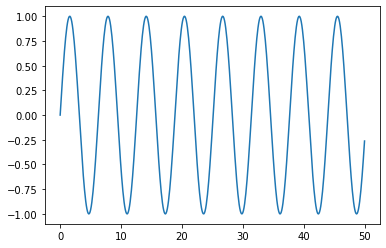

In [61]:
# tracage données d'origine
plt.plot(df.index,df['Sinus'])